<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



##1)

In [161]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy as sc

In [81]:
Tinf=300 #K
A = 5*1E-5 #m**2
p = 0.102 #m
k = 200 #W/(m*k)
Tb = 313 #K
h = 20 #(W/(m**2)*(k))

In [196]:
y=[Tb-Tinf,0]
a=(h*p)/(k*A)

In [195]:
def temp(y, t,a):
    theta, omega = y
    dydt = [omega,a**2*theta]
    return dydt

In [178]:
x=np.linspace(0,0.5,1000)

In [197]:
sol = odeint(temp, y, x, args=(a,))

##2)

In [180]:
@np.vectorize
def Temperatura(x):
  a=-x*((h*p)/(k*A))**(1/2)
  b=Tb-Tinf
  return Tinf+b*np.exp(a)

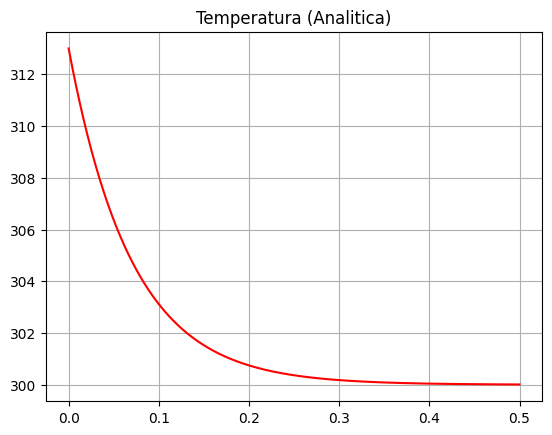

In [189]:
plt.plot(x,Temperatura(x),color="red")
plt.title("Temperatura (Analitica)")
plt.grid()

##3)

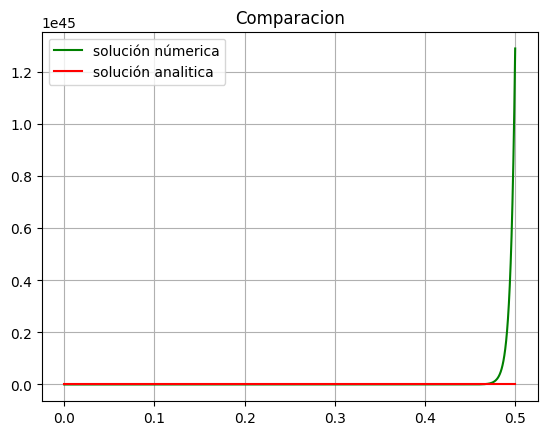

In [202]:
plt.plot(x,sol[::,0],color="green",label="solución númerica")
plt.plot(x,Temperatura(x),color="red",label="solución analitica")
plt.title("Comparacion")
plt.grid()
plt.legend()

##4)

In [182]:
def ceros(x):
  return Temperatura(x)-305

In [183]:
cero=sc.optimize.newton(ceros,0)

In [184]:
cero #en este punto la temperatura es igual a 305

0.0668991823266331

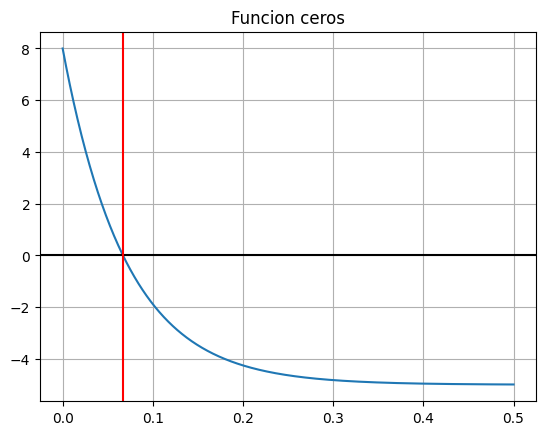

In [187]:
plt.plot(x,ceros(x))
plt.title("Funcion ceros")
plt.axhline(y=0,color="black")
plt.axvline(x=cero,color="red")
plt.grid()